In [1]:
import sys,os
import tarfile
import warnings

import numpy as np
import pandas as pd
import xarray as xr

import SDFC.link as sdl
import NSSEA as ns
import NSSEA.plot as nsp
import NSSEA.models as nsm
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

import cftime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as mpdf
import matplotlib.patches as mplpatch
import seaborn as sns
sns.set_context("talk")

In [2]:
%run ../Scripts/data_preparation.py

In [3]:
basepath=os.path.abspath(os.getcwd())
pathInp='/home/barbauxo/Documents/Doctorat/03_Travail/2023_01 Application Tricastin/Data'
pathOut='../Outputs'
assert(os.path.exists(pathInp))
assert(os.path.exists(pathOut))
time_period    = np.arange( 1850 , 2101 , 1 , dtype = np.int )
time_reference = np.arange( 1986 , 2016 , 1 , dtype = np.int )
type_data="03_Post_treatment"  #"02_Selected" #"03_Post_treatment" #But no absolute

/tmp/ipykernel_22392/3800666543.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_period    = np.arange( 1850 , 2101 , 1 , dtype = np.int )
/tmp/ipykernel_22392/3800666543.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

In [4]:
os.path.join(pathInp,"CMIP6/X",type_data)

'/home/barbauxo/Documents/Doctorat/03_Travail/2023_01 Application Tricastin/Data/CMIP6/X/03_Post_treatment'

# Valeurs en Température absolue

In [5]:
#Data in absolute
lX,lY,models=load_models_CMIP6(pathInp,type_data)
Xo,Yo=load_obs(pathInp,type_data)
dXo_abs=xr.open_dataset(os.path.join( pathInp ,"Observations/02_Selected/absolute.nc"))
Xo_abs  =Xo+dXo_abs.tem.values.squeeze()

Xo_abs

['ACCESS-CM2_i1p1f1', 'ACCESS-ESM1-5_i1p1f1', 'CMCC-ESM2_i1p1f1', 'CNRM-CM6-1-HR_i1p1f2', 'CNRM-CM6-1_i1p1f2', 'CNRM-ESM2-1_i1p1f2', 'CanESM5_i1p2f1', 'EC-Earth3-CC_i1p1f1', 'EC-Earth3-Veg-LR_i1p1f1', 'EC-Earth3-Veg_i1p1f1', 'EC-Earth3_i1p1f1', 'FGOALS-g3_i1p1f1', 'GFDL-ESM4_i1p1f1', 'HadGEM3-GC31-LL_i1p1f3', 'HadGEM3-GC31-MM_i1p1f3', 'INM-CM4-8_i1p1f1', 'INM-CM5-0_i1p1f1', 'IPSL-CM6A-LR_i1p1f1', 'KACE-1-0-G_i1p1f1', 'MIROC-ES2L_i1p1f2', 'MIROC6_i1p1f1', 'MPI-ESM1-2-LR_i1p1f1', 'MRI-ESM2-0_i1p1f1', 'MRI-ESM2-0_i2p1f1', 'NESM3_i1p1f1', 'NorESM2-MM_i1p1f1', 'TaiESM1_i1p1f1', 'UKESM1-0-LL_i1p1f2']


Xo
1850   8.180534
1851   8.473060
1852   8.937555
1853   8.185602
1854   8.547499
...         ...
2018  10.473222
2019  10.510613
2020  10.854976
2021  10.065214
2022  10.833267

[173 rows x 1 columns]

In [6]:
#!!! Obs en anomalies

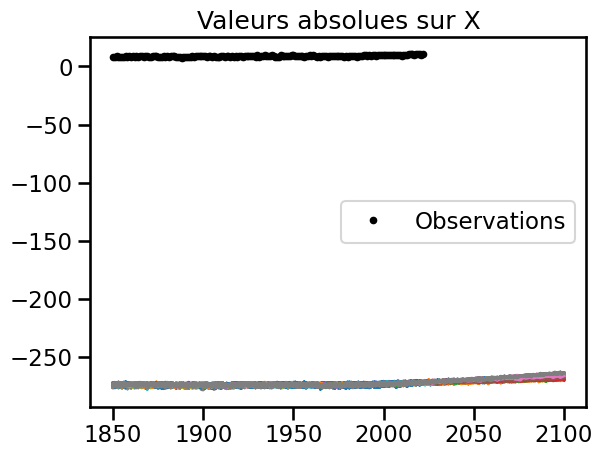

<Figure size 640x480 with 0 Axes>

In [7]:
#Moyenne pour l'année et Celcius
X_means=[]
for X in lX:
    X.index.name= 'Year'
    
    X_means.append(X.groupby('Year').aggregate({X.columns[0]:np.mean})-273.15
                  )

    
fig, ax = plt.subplots()
period=list(X_means[0].index)
for i in range(0,len(X_means)):
    #ax.plot(period,X_means[i].values )
    period2=list(lX[i].index)
    ax.plot(period2,lX[i].values -273.15)
ax.plot( Xo_abs.index , Xo_abs.values        , color = "black" , linestyle = ""  , marker=  "." , label="Observations")

xlim = ax.get_xlim()
#ax.hlines( 0 , xlim[0] , xlim[1] , color = "grey" )
#plt.xticks(list(plt.xticks()[0]) + [1986,2016])

ax.set_xlim(xlim)
plt.title("Valeurs absolues sur X")
plt.legend( )
plt.show()
plt.savefig(os.path.join( pathOut ,type_data+"_Absolutes_X_All.png"))

# Valeurs en Anomalies

In [8]:
lX,lY,models=load_models_CMIP6(pathInp,type_data)
Xo,Yo=load_obs(pathInp,type_data)
if type_data=="02_Selected":
    Xo,Yo,lX,lY,bias=Everyone_as_anomaly(Xo,Yo,lX,lY,time_reference)
#Xo,Yo,lX,lY,bias=Everyone_as_anomaly(Xo,Yo,lX,lY,time_reference)

['ACCESS-CM2_i1p1f1', 'ACCESS-ESM1-5_i1p1f1', 'CMCC-ESM2_i1p1f1', 'CNRM-CM6-1-HR_i1p1f2', 'CNRM-CM6-1_i1p1f2', 'CNRM-ESM2-1_i1p1f2', 'CanESM5_i1p2f1', 'EC-Earth3-CC_i1p1f1', 'EC-Earth3-Veg-LR_i1p1f1', 'EC-Earth3-Veg_i1p1f1', 'EC-Earth3_i1p1f1', 'FGOALS-g3_i1p1f1', 'GFDL-ESM4_i1p1f1', 'HadGEM3-GC31-LL_i1p1f3', 'HadGEM3-GC31-MM_i1p1f3', 'INM-CM4-8_i1p1f1', 'INM-CM5-0_i1p1f1', 'IPSL-CM6A-LR_i1p1f1', 'KACE-1-0-G_i1p1f1', 'MIROC-ES2L_i1p1f2', 'MIROC6_i1p1f1', 'MPI-ESM1-2-LR_i1p1f1', 'MRI-ESM2-0_i1p1f1', 'MRI-ESM2-0_i2p1f1', 'NESM3_i1p1f1', 'NorESM2-MM_i1p1f1', 'TaiESM1_i1p1f1', 'UKESM1-0-LL_i1p1f2']


In [9]:
import seaborn as sns
custom_params = {"axes.spines.bottom": True,"axes.spines.right": True,"axes.spines.left": True, "axes.spines.top":True}
#sns.set_theme(style="white",rc=custom_params)
sns.set_context("talk")
from matplotlib.ticker import FormatStrFormatter
from cycler import cycler

In [10]:
mpl.rcParams["axes.prop_cycle"]= cycler('color', list(reversed(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])))

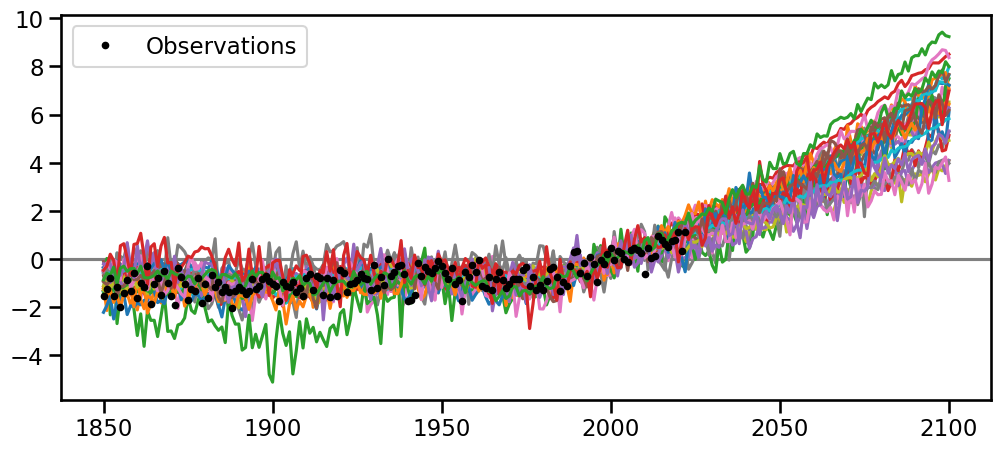

In [26]:
#Comparaison en anomalie

X_means=[]
for X in lX:
    X.index.name= 'Year'
    
    X_means.append(X.groupby('Year').aggregate({X.columns[0]:np.mean}) )
    
     
fig, ax = plt.subplots(figsize=(12, 5))
period=list(X_means[0].index)
for i in range(0,len(X_means)):
    #ax.plot(period,X_means[i].values,color = "red" )
    period=list(X_means[i].index)
    ax.plot(period,X_means[i].values )
ax.plot( Xo.index , Xo.values        , color = "black" , linestyle = ""  , marker=  "." , label="Observations")

xlim = ax.get_xlim()
ax.hlines( 0 , xlim[0] , xlim[1] , color = "grey" )
#plt.xticks(list(plt.xticks()[0]) + [1986,2016])

ax.set_xlim(xlim)
#plt.title("Anomaly on X")
plt.legend( )

plt.savefig(os.path.join( pathOut ,type_data+"_Anomalies_X_All_NoTitle.png"))
plt.show()

In [34]:
Y_means[i].values

array([[-0.8349515 ],
       [-1.147677  ],
       [-0.9408522 ],
       [-0.4853985 ],
       [-1.3092417 ],
       [-0.43283316],
       [ 0.85723877],
       [-0.93925595],
       [-0.02036696],
       [-0.8190636 ],
       [-0.72875035],
       [-0.4073674 ],
       [-0.9549936 ],
       [-1.7037354 ],
       [-1.113779  ],
       [-0.6345872 ],
       [-0.39200532],
       [-0.0179819 ],
       [-1.3444355 ],
       [-0.748676  ],
       [-1.0839374 ],
       [ 0.19547527],
       [-0.33044434],
       [-1.0466403 ],
       [-0.6458177 ],
       [-0.34665152],
       [-1.470243  ],
       [-0.5778151 ],
       [-1.2714374 ],
       [ 0.15311687],
       [ 0.6492169 ],
       [ 0.59830415],
       [-1.0189397 ],
       [-0.611807  ],
       [-3.786161  ],
       [-1.7808087 ],
       [-0.09905536],
       [-1.7264029 ],
       [-1.324491  ],
       [-0.8054669 ],
       [-0.88717884],
       [-1.3581073 ],
       [-1.2030029 ],
       [-0.22692871],
       [-1.0016433 ],
       [-0

In [36]:
Y_means.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

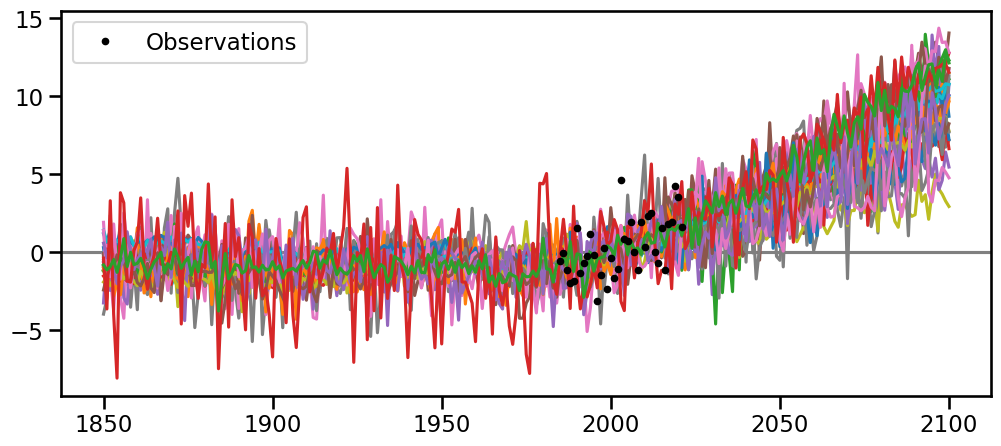

In [25]:
#Comparaison en anomalie
Y_means=[]

for Y in lY:
    Y.index.name= 'Year'
    
    Y_means.append(Y.groupby('Year').aggregate({Y.columns[0]:np.mean}))
                 
fig, ax = plt.subplots(figsize=(12, 5))
period=list(Y_means[0].index)
for i in range(0,len(X_means)):
    #ax.plot(period,X_means[i].values,color = "red" )
    period=list(Y_means[i].index)
    ax.plot(period,Y_means[i].values )
    
ax.plot( Yo.index , Yo.values        , color = "black" , linestyle = ""  , marker=  "." , label="Observations")

xlim = ax.get_xlim()
ax.hlines( 0 , xlim[0] , xlim[1] , color = "grey" )
#plt.xticks(list(plt.xticks()[0]) + [1986,2016])

ax.set_xlim(xlim)
#plt.title("Anomalies sur Y")
plt.legend( )

plt.savefig(os.path.join( pathOut ,type_data+"_Anomalies_Y_All_Notitle.png"))
plt.show()

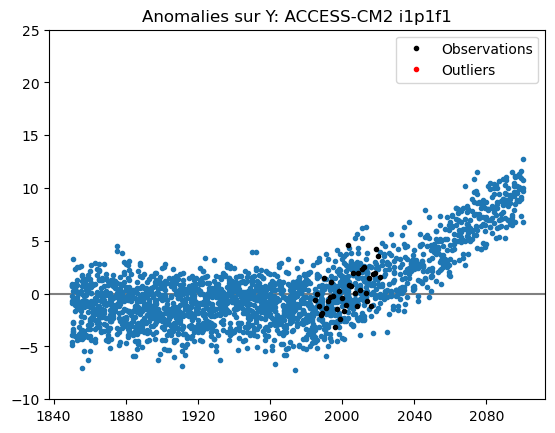

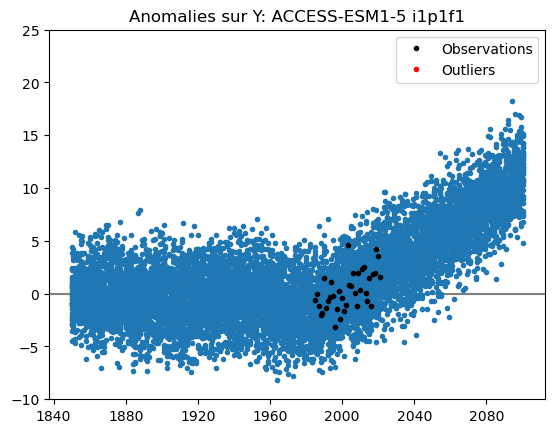

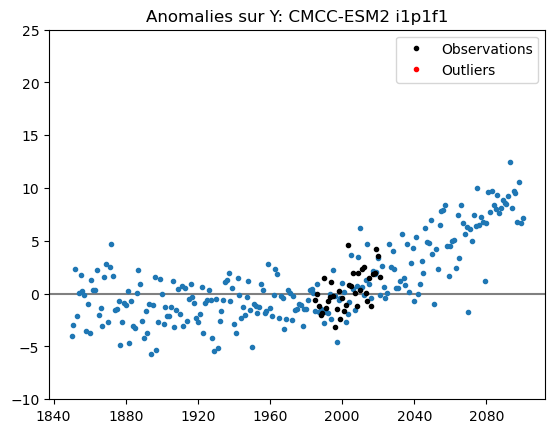

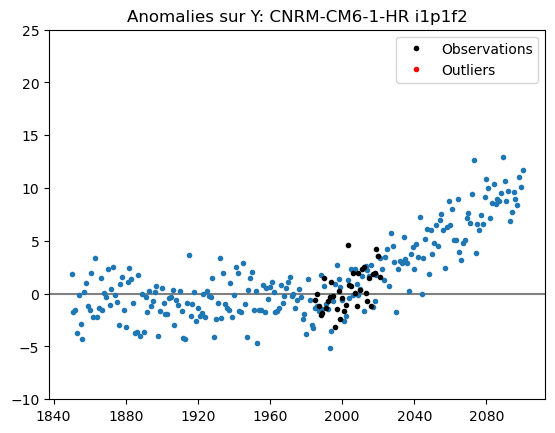

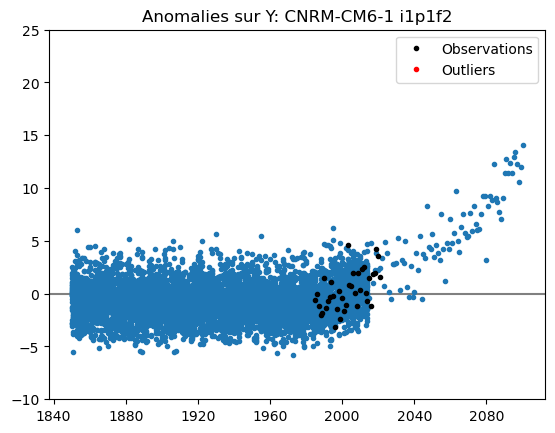

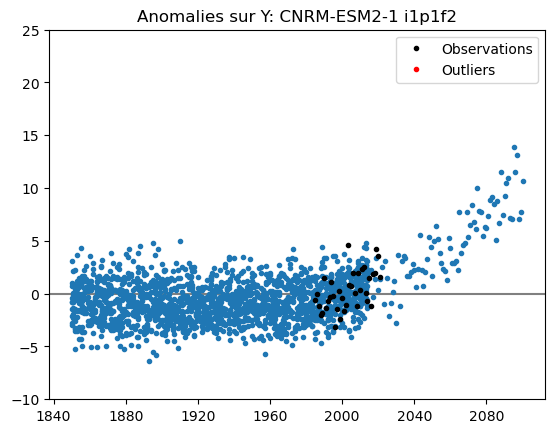

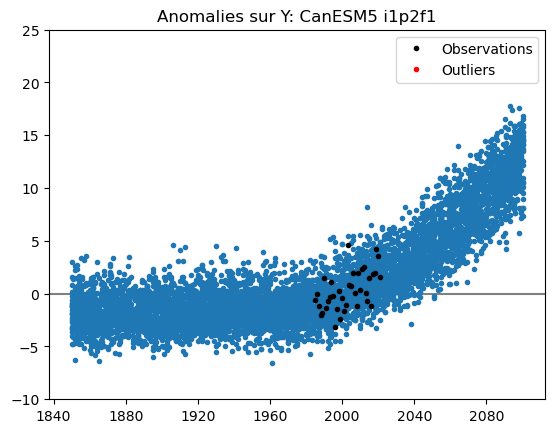

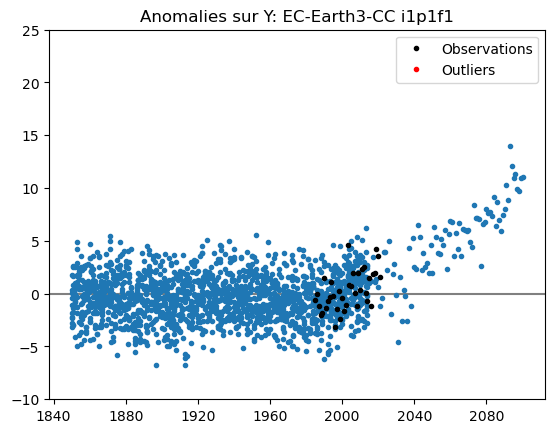

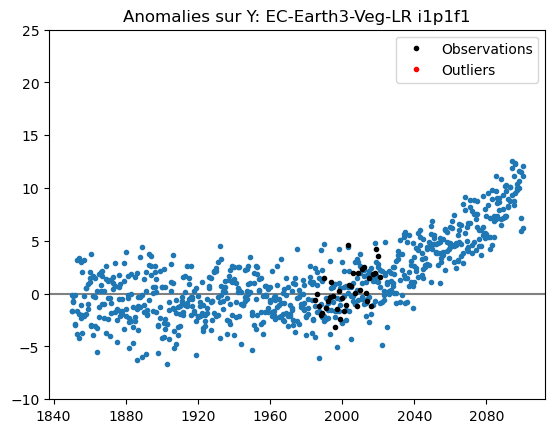

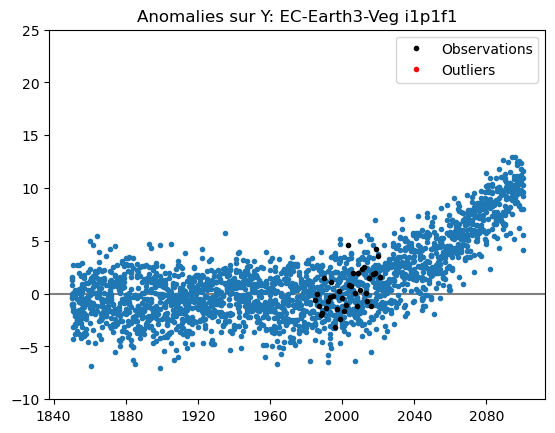

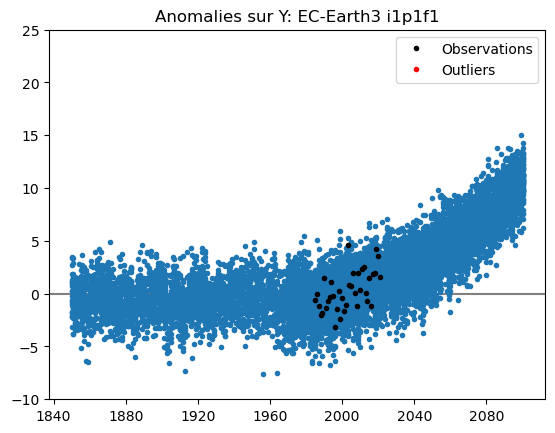

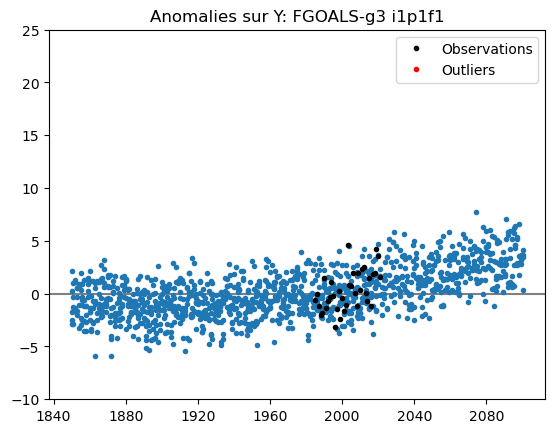

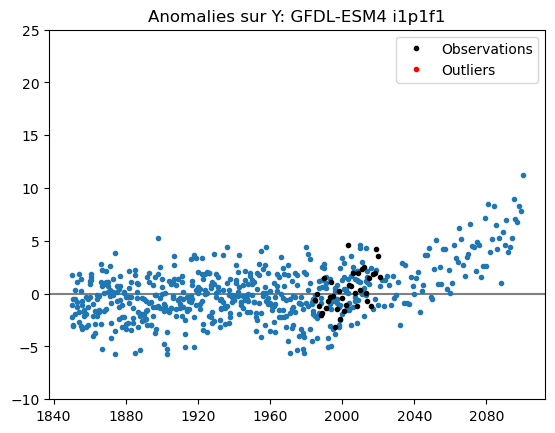

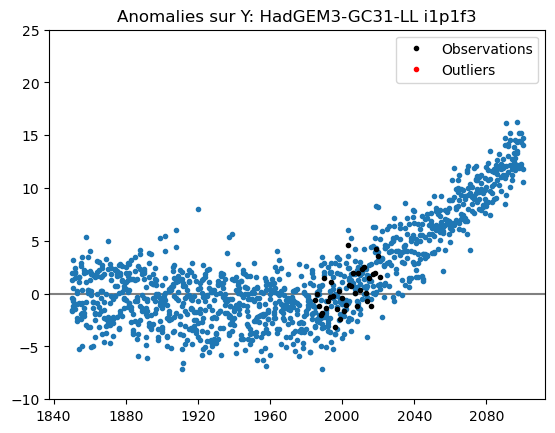

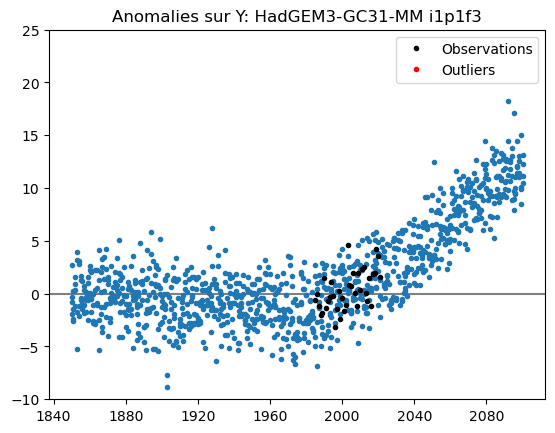

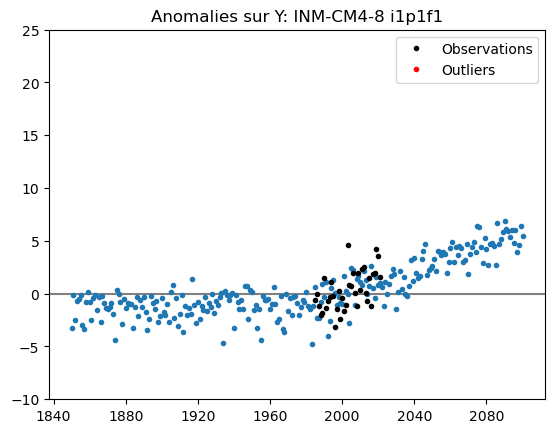

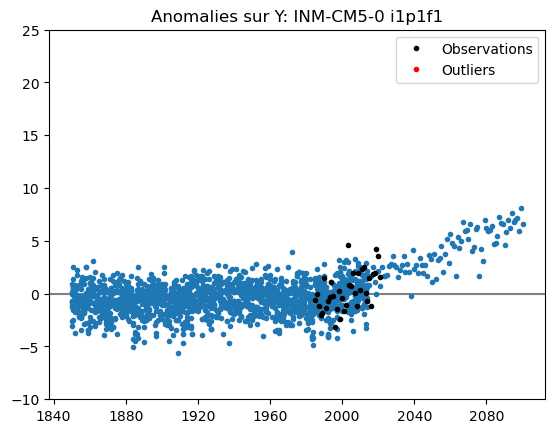

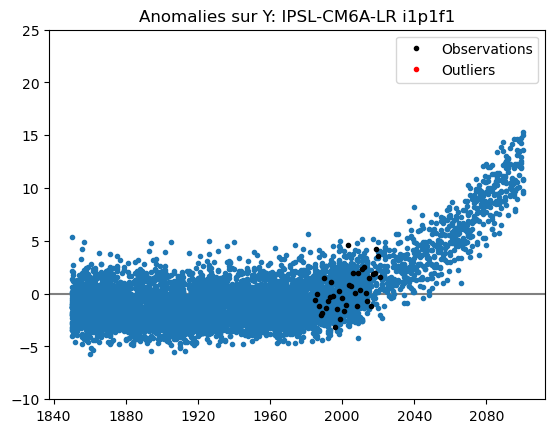

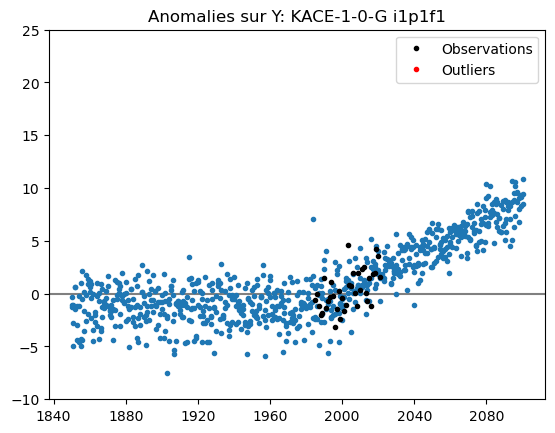

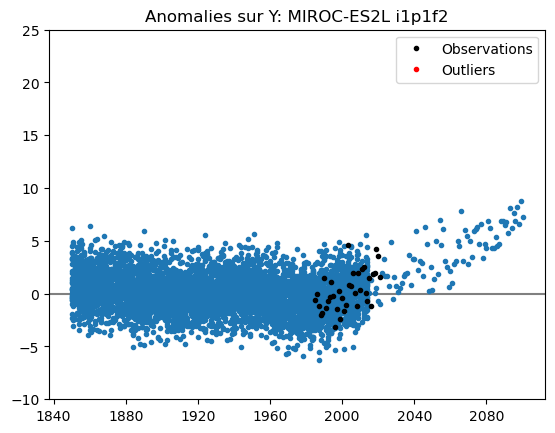

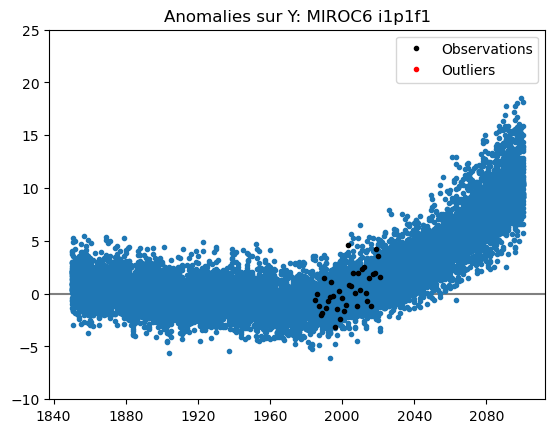

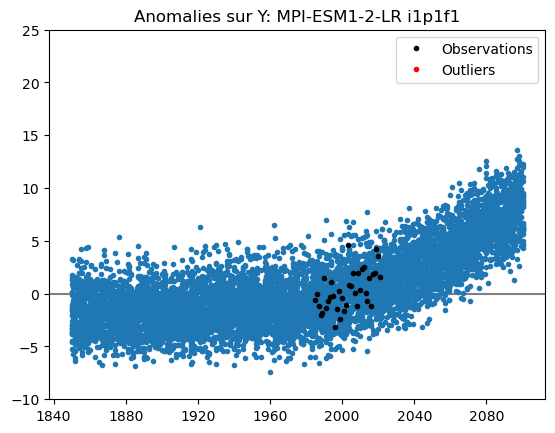

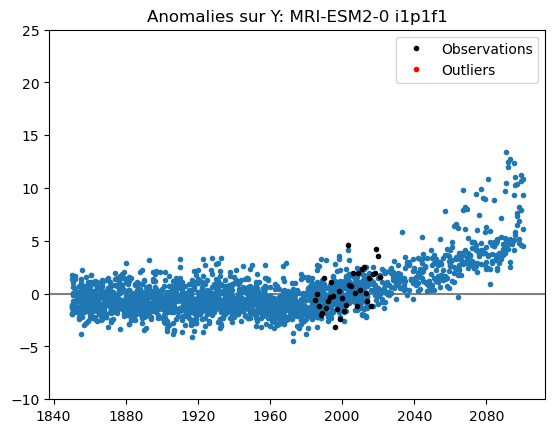

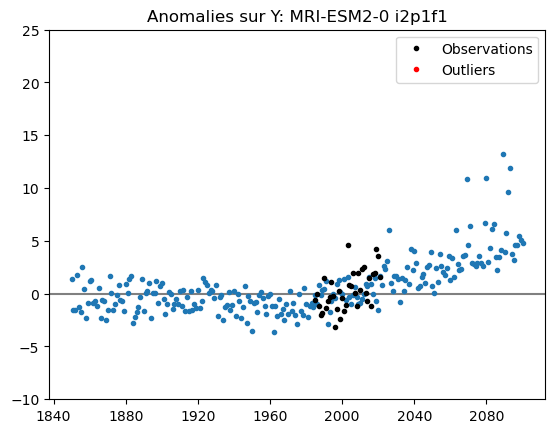

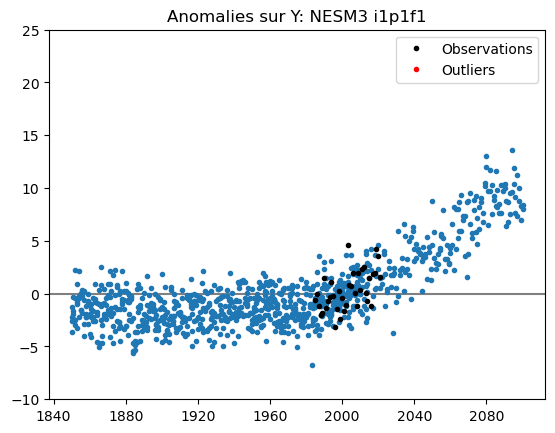

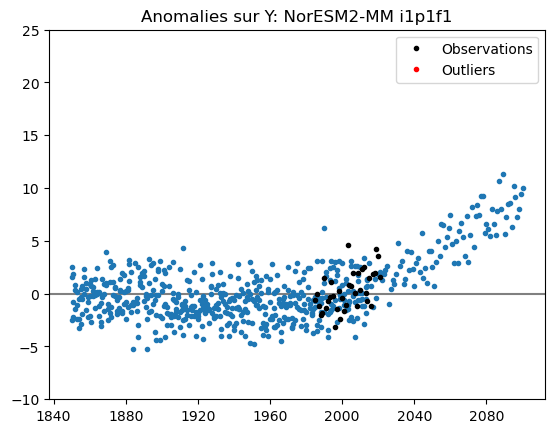

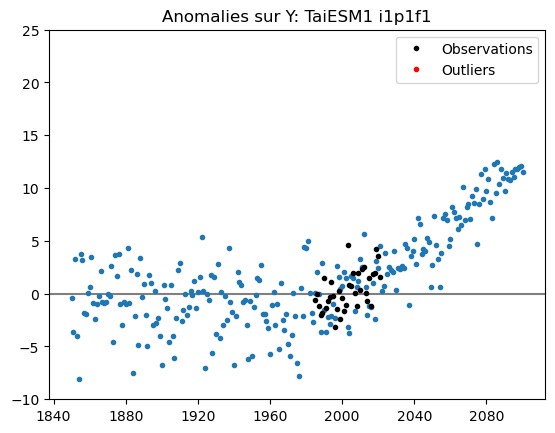

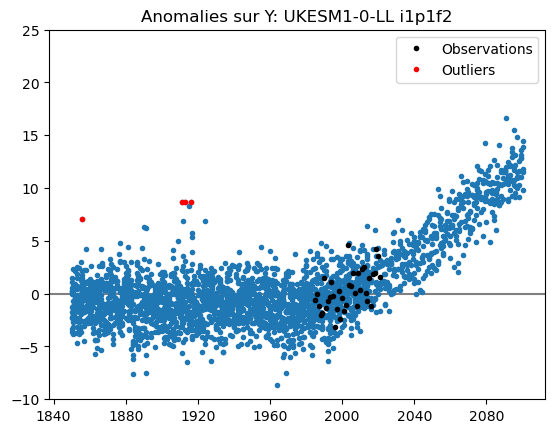

In [7]:
ofile=os.path.join( pathOut , type_data+"_Anomalies_Y_Modeles.pdf" )
pdf = mpdf.PdfPages( ofile )
for i in range(0,len(lY)):
    m=models[i]
    fig, ax = plt.subplots()
    #period=list(Y_means[0].index)
    
    #ax.plot(period,X_means[i].values,color = "red" )
    period=list(lY[i].index.astype(str))
    ax.plot(pd.to_datetime(period, infer_datetime_format=True),lY[i][m].values, linestyle = ""  , marker=  "."  )
    ax.plot( pd.to_datetime(Yo.index.astype(str), infer_datetime_format=True) , Yo.values        , color = "black" , linestyle = ""  , marker=  "." , label="Observations")
    
    Outliers=is_outlier(lY[i], m)
    Y_anomalies=Outliers[(Outliers['Anomalies']==1)]
    ax.plot( pd.to_datetime(Y_anomalies.index.astype(str)) , Y_anomalies[m].values, color = "red" , linestyle = ""  , marker=  "." , label="Outliers")
    
    
    #ax.plot(Y_means_rolling[i].index,Y_means_rolling[i].values,color = "red"  )
    xlim = ax.get_xlim()
    ax.hlines( 0 , xlim[0] , xlim[1] , color = "grey" )
    #plt.xticks(list(plt.xticks()[0]) + [1986,2016])

    ax.set_xlim(xlim)
    ax.set_ylim([-10,25])
    plt.title(" ".join(["Anomalies sur Y:"," ".join(m.split("_"))]))
    plt.legend()
    plt.show()
    


    #fig.suptitle( " ".join(m.split("_")) , fontsize = 20 )


    fig.set_tight_layout(True)
    pdf.savefig(fig)
    plt.close(fig)

pdf.close()

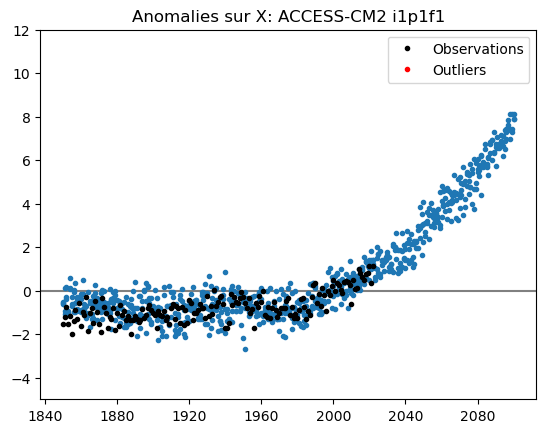

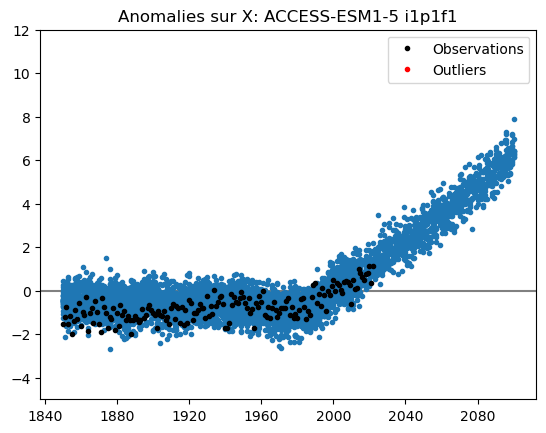

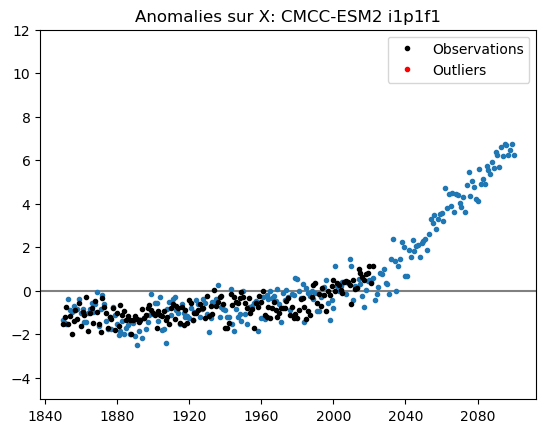

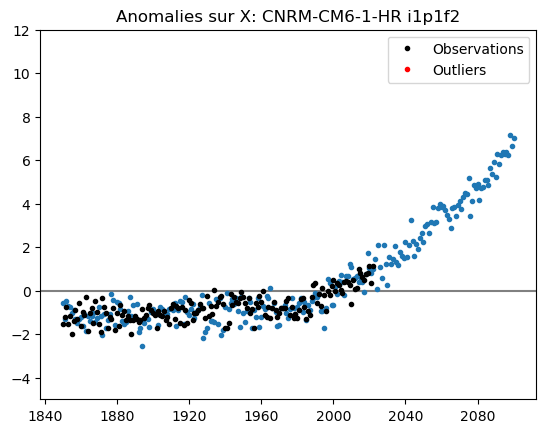

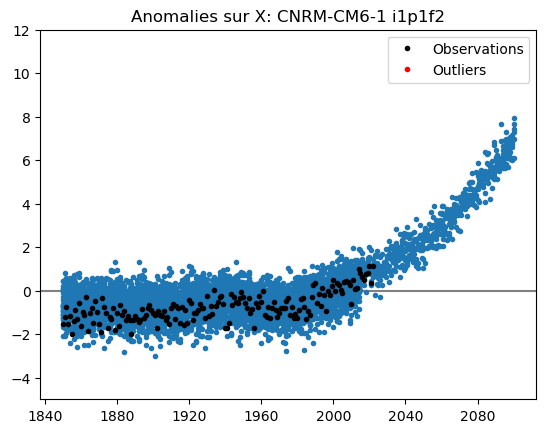

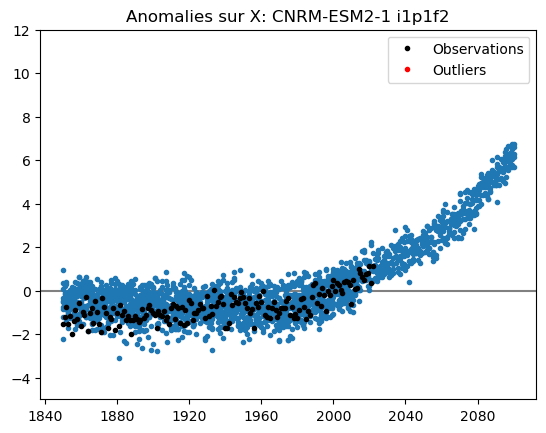

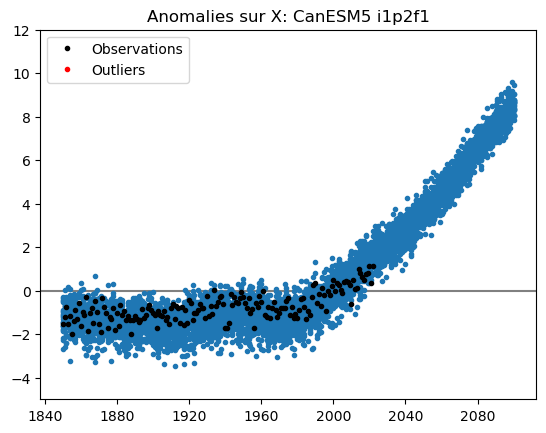

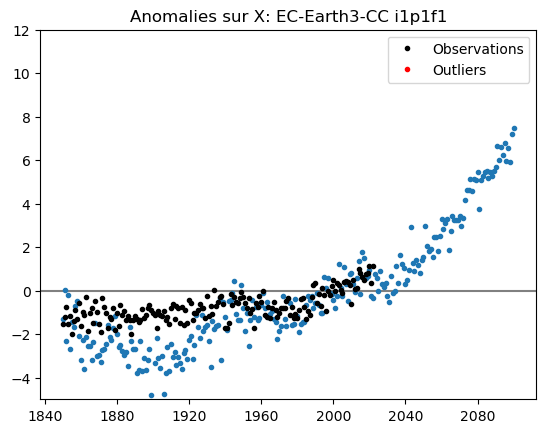

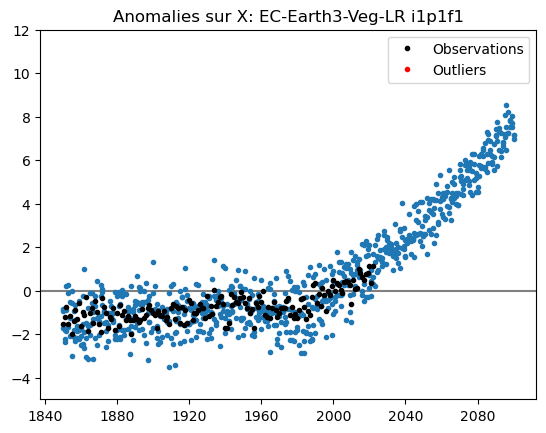

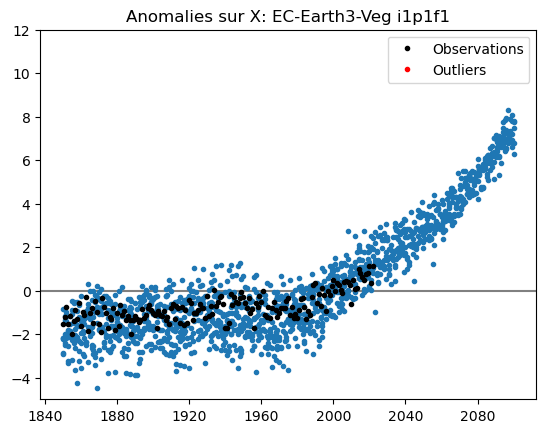

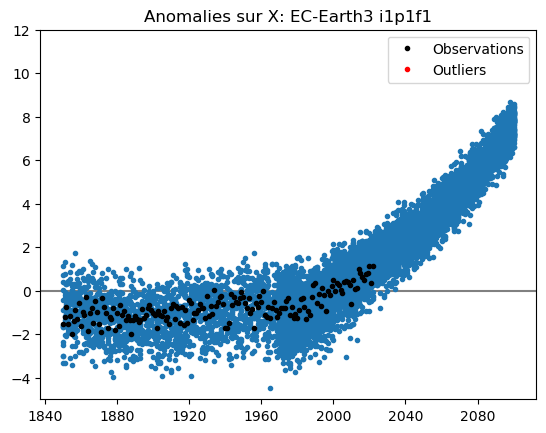

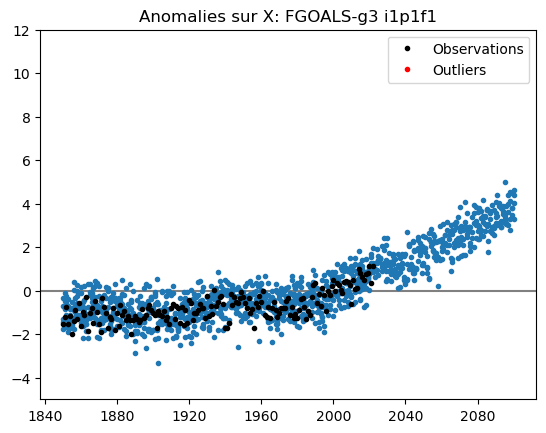

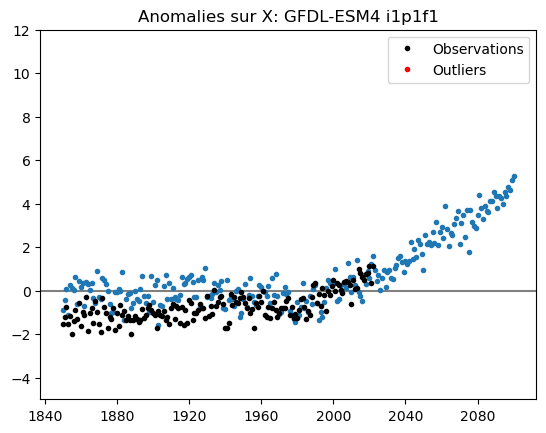

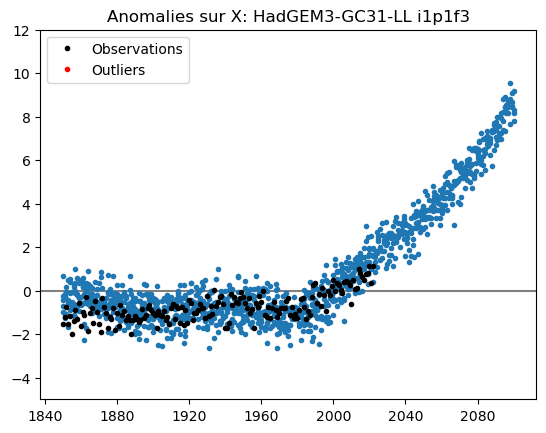

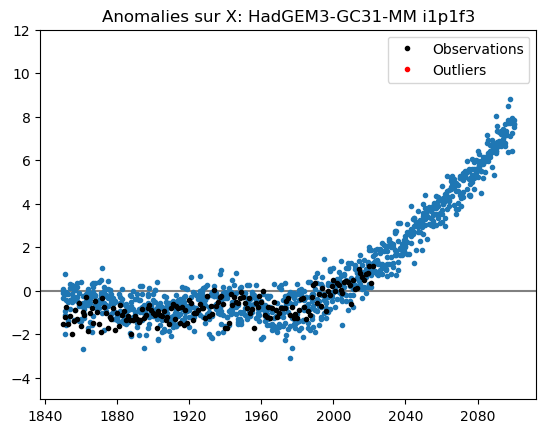

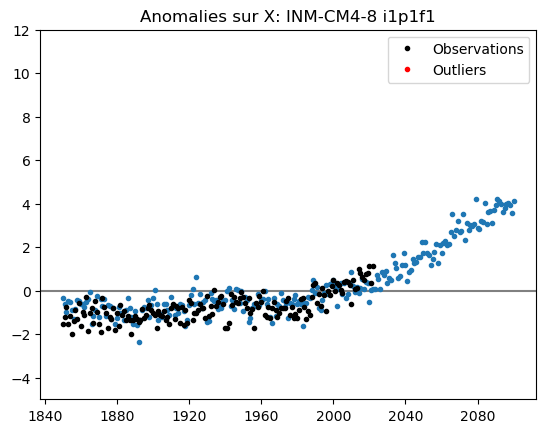

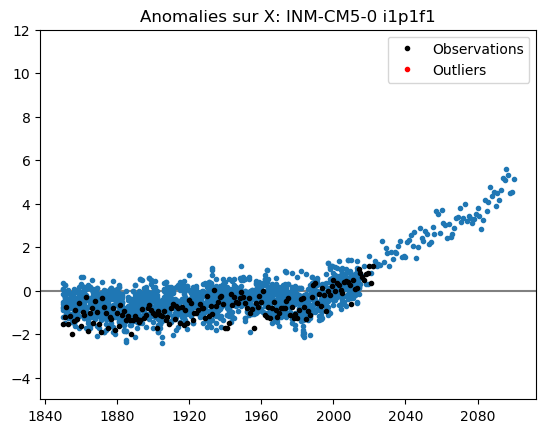

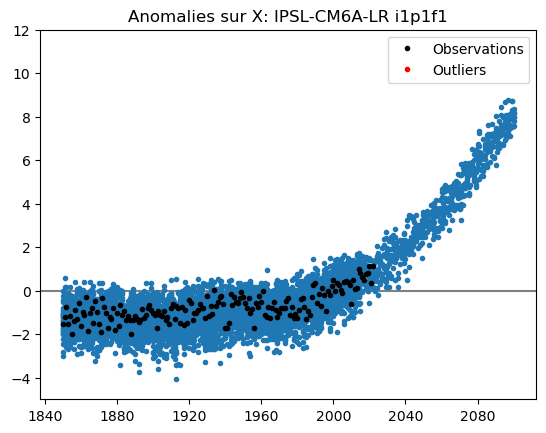

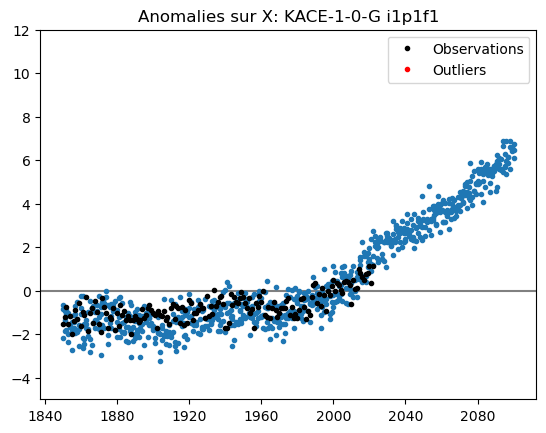

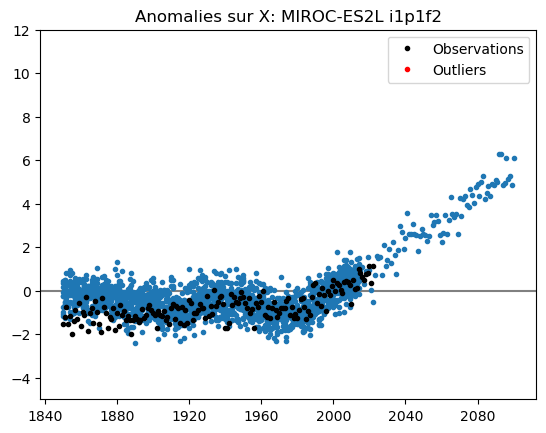

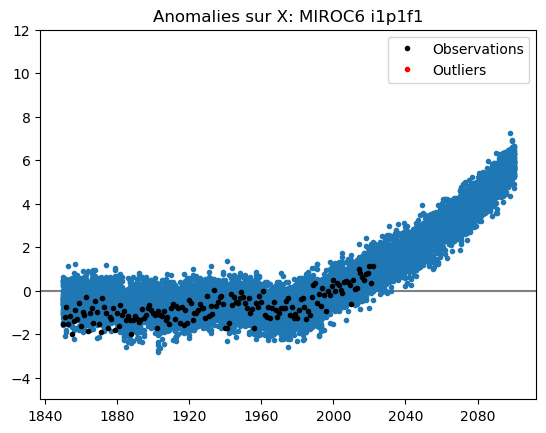

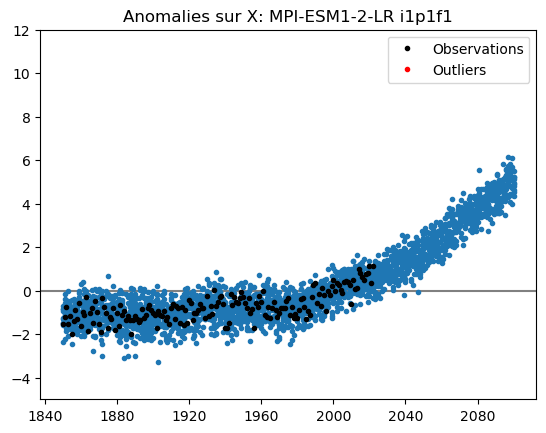

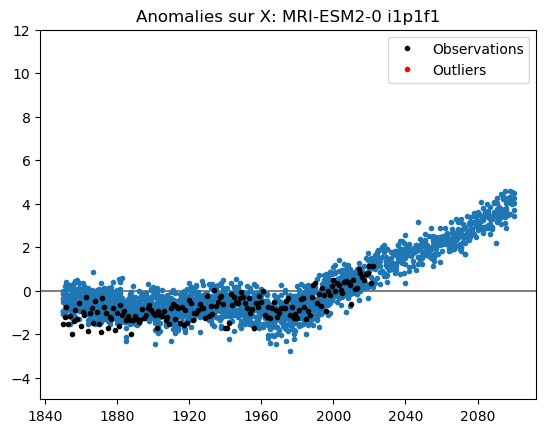

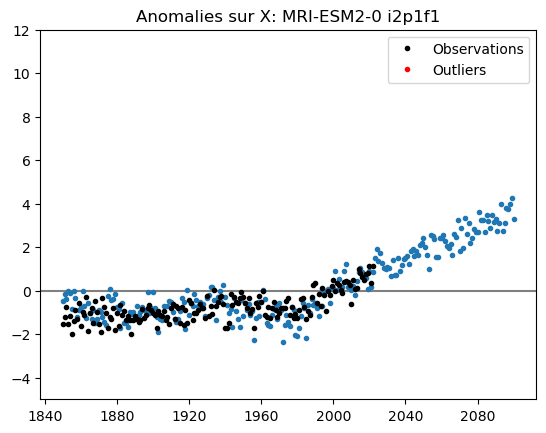

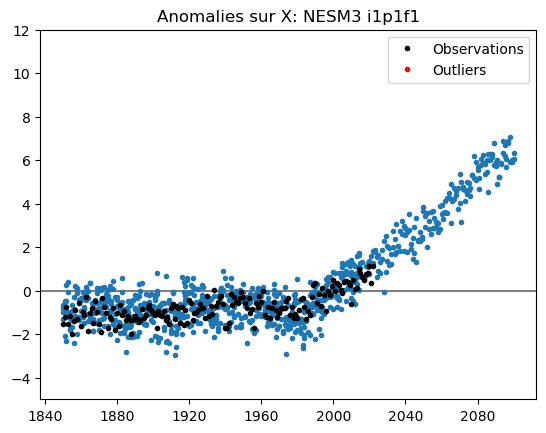

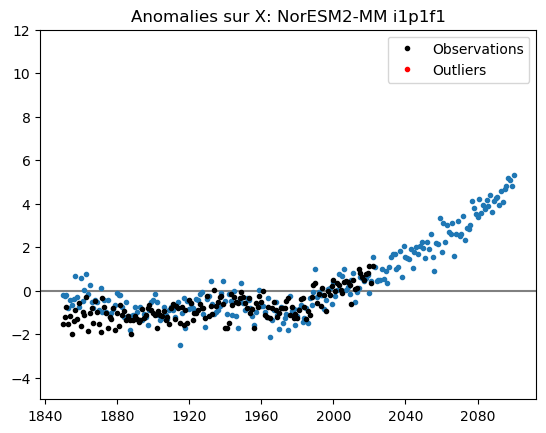

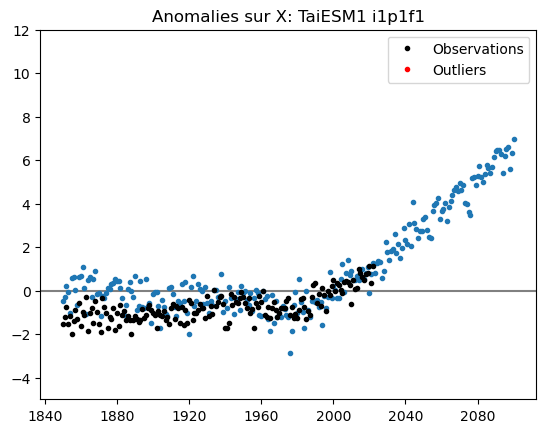

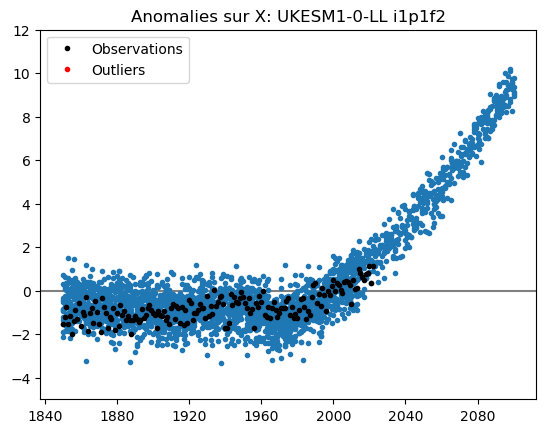

In [8]:
ofile=os.path.join( pathOut , type_data+"_Anomalies_X_Modeles.pdf" )
pdf = mpdf.PdfPages( ofile )
for i in range(0,len(lX)):
    m=models[i]
    fig, ax = plt.subplots()
    #period=list(Y_means[0].index)
    
    #ax.plot(period,X_means[i].values,color = "red" )
    period=list(lX[i].index.astype(str))
    ax.plot(pd.to_datetime(period, infer_datetime_format=True),lX[i][m].values, linestyle = ""  , marker=  "."  )
    ax.plot( pd.to_datetime(Xo.index.astype(str), infer_datetime_format=True) , Xo.values        , color = "black" , linestyle = ""  , marker=  "." , label="Observations")
    
    Outliers=is_outlier(lX[i], m)
    X_anomalies=Outliers[(Outliers['Anomalies']==1)]
    ax.plot( pd.to_datetime(X_anomalies.index.astype(str)) , X_anomalies[m].values, color = "red" , linestyle = ""  , marker=  "." , label="Outliers")
    
    
    #ax.plot(Y_means_rolling[i].index,Y_means_rolling[i].values,color = "red"  )
    xlim = ax.get_xlim()
    ax.hlines( 0 , xlim[0] , xlim[1] , color = "grey" )
    #plt.xticks(list(plt.xticks()[0]) + [1986,2016])

    ax.set_xlim(xlim)
    ax.set_ylim([-5,12])
    plt.title(" ".join(["Anomalies sur X:"," ".join(m.split("_"))]))
    plt.legend()
    plt.show()
    


    #fig.suptitle( " ".join(m.split("_")) , fontsize = 20 )


    fig.set_tight_layout(True)
    pdf.savefig(fig)
    plt.close(fig)

pdf.close()

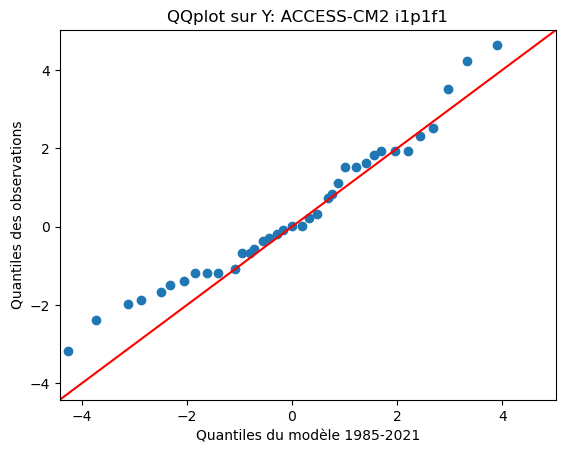

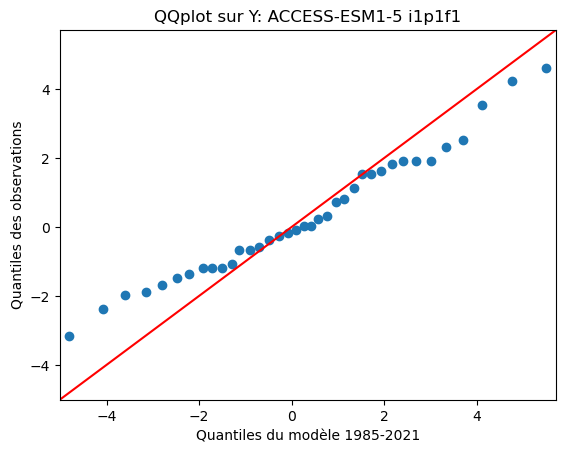

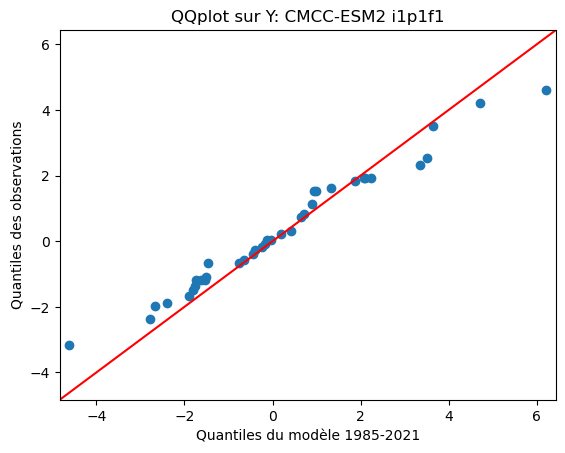

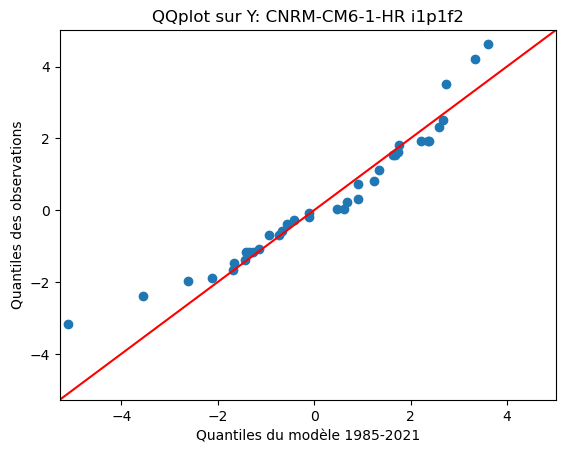

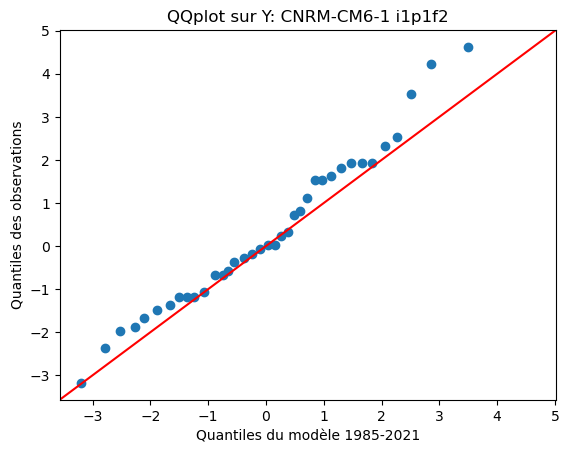

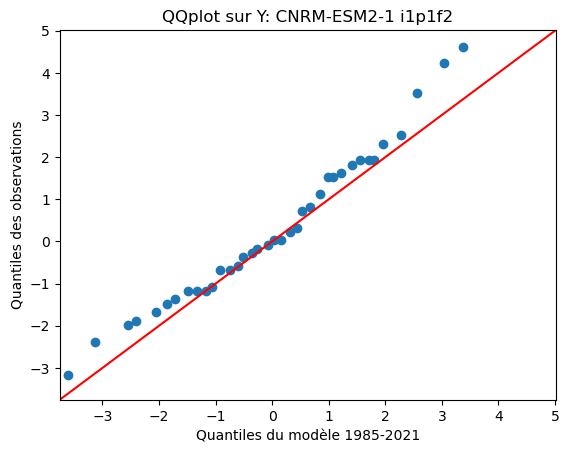

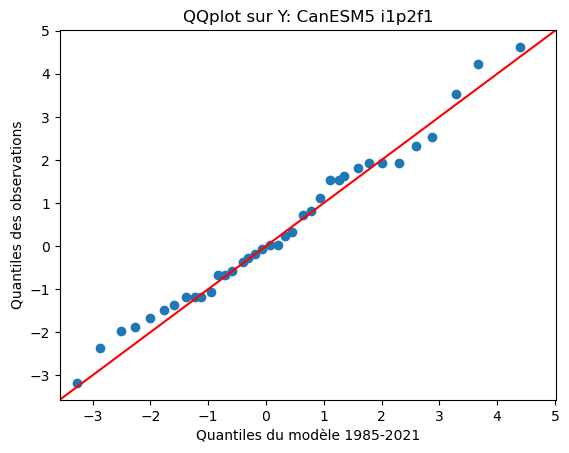

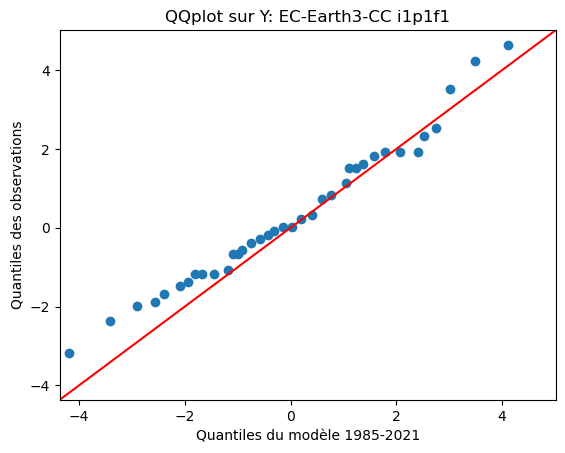

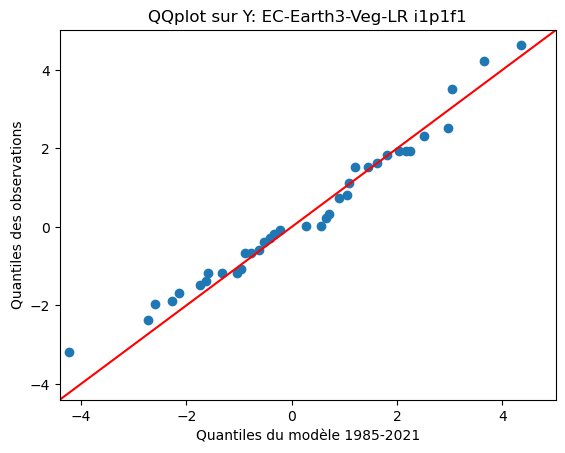

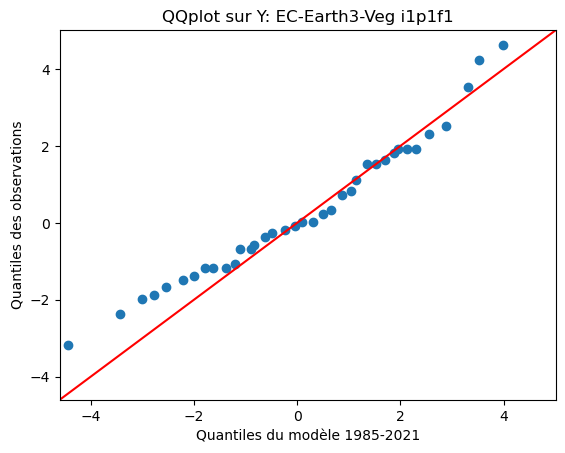

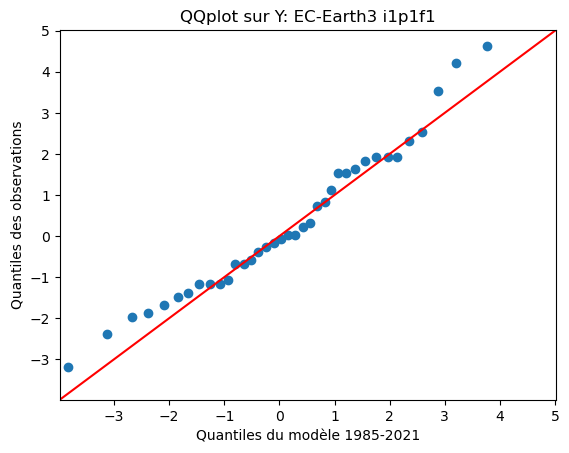

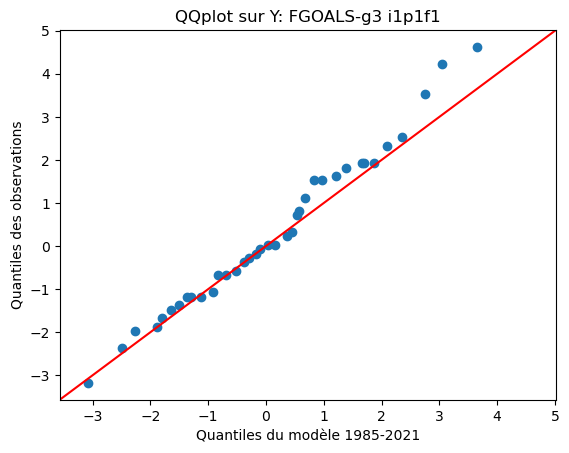

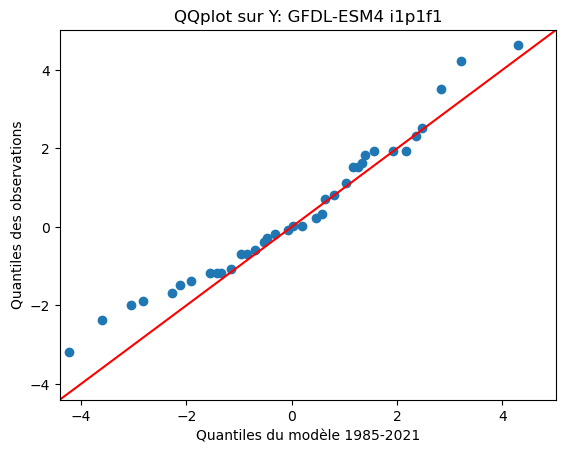

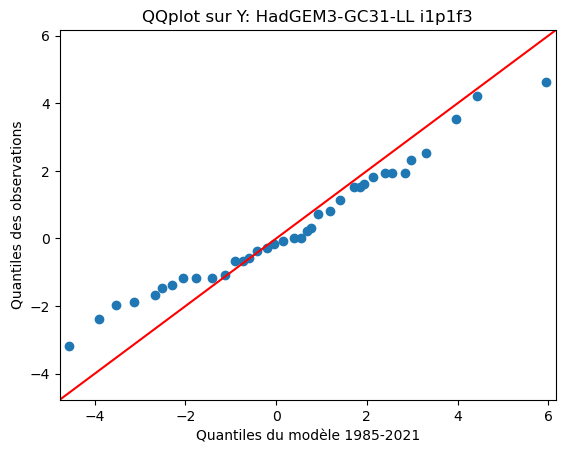

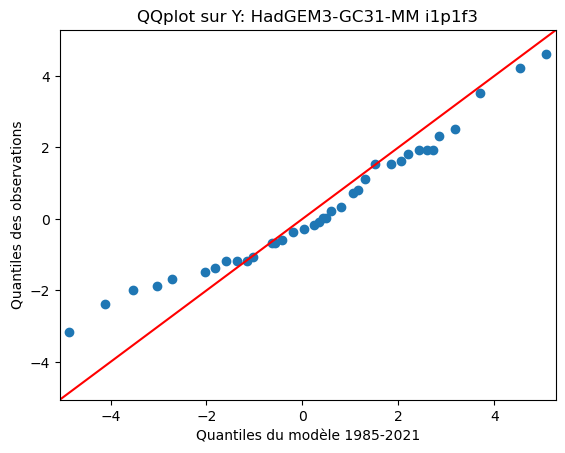

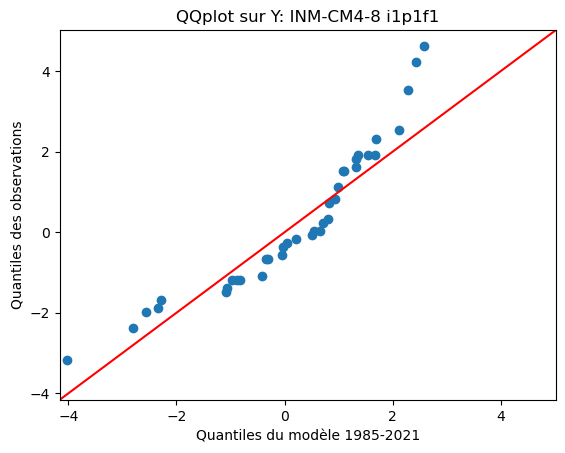

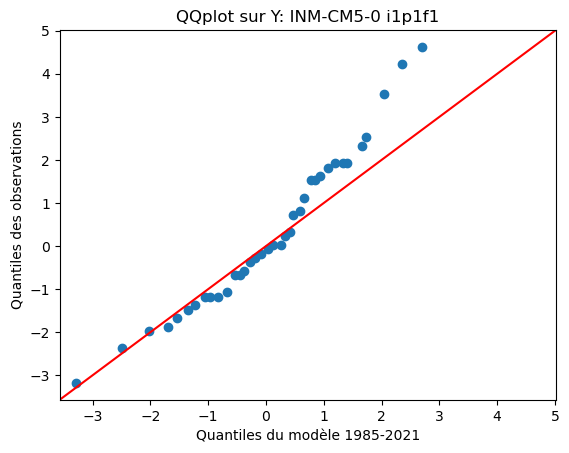

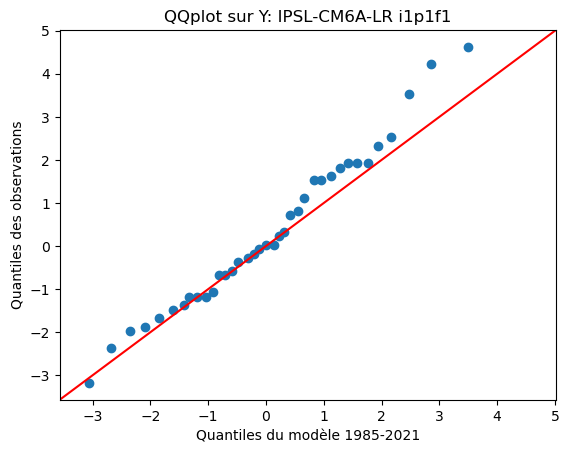

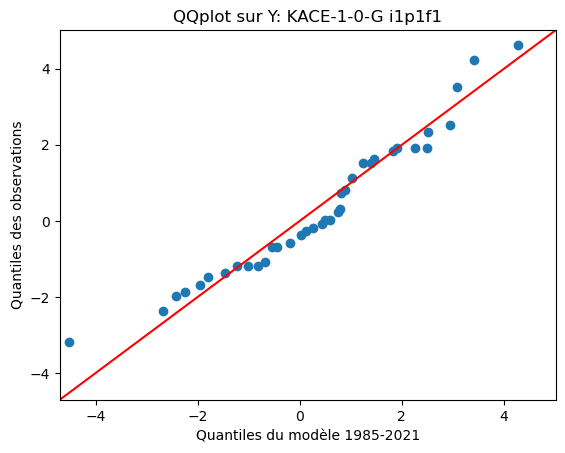

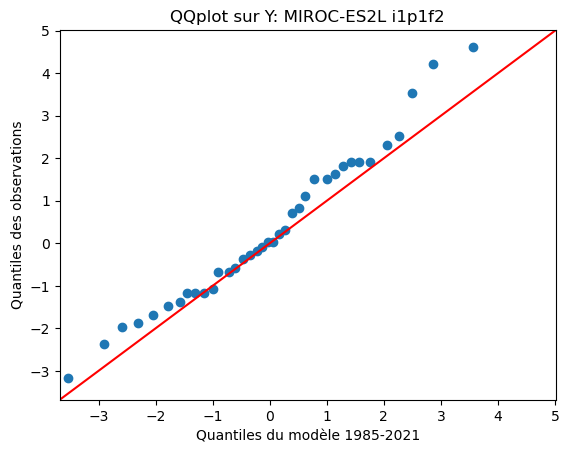

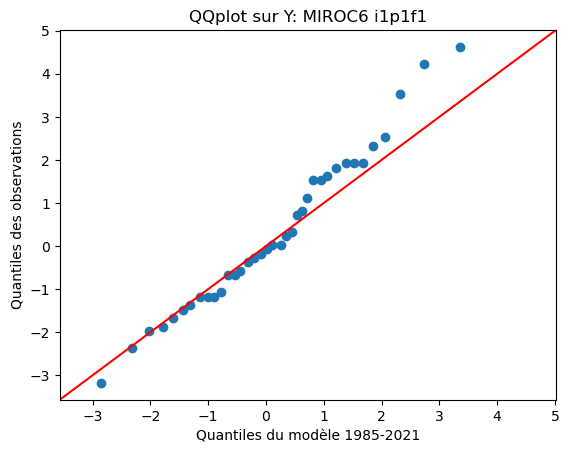

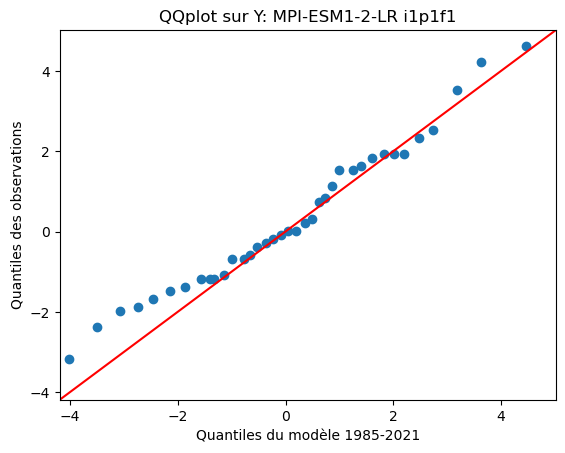

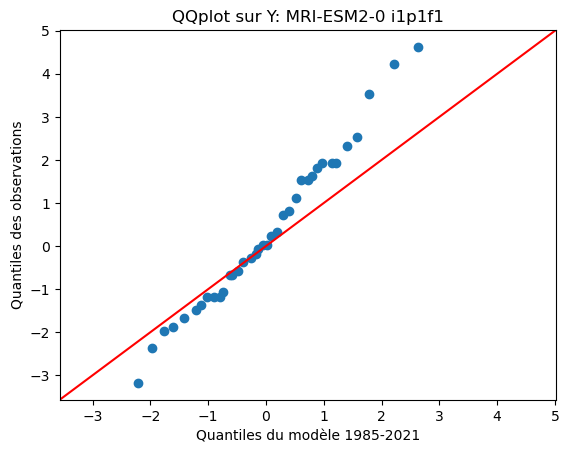

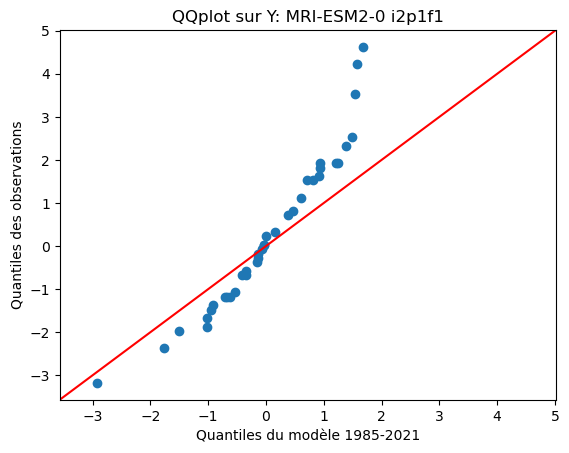

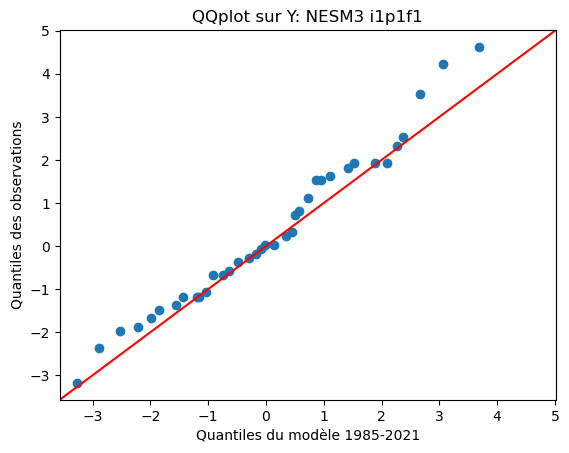

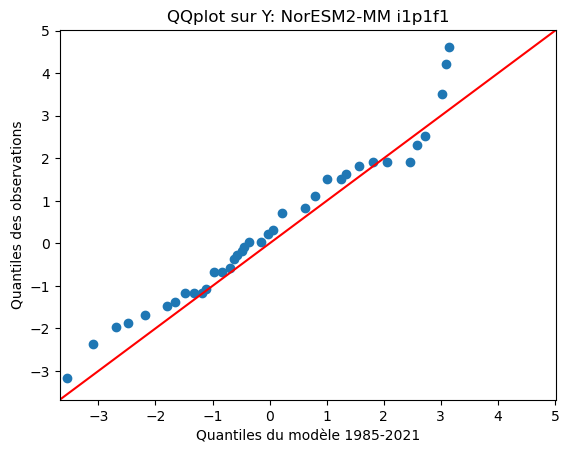

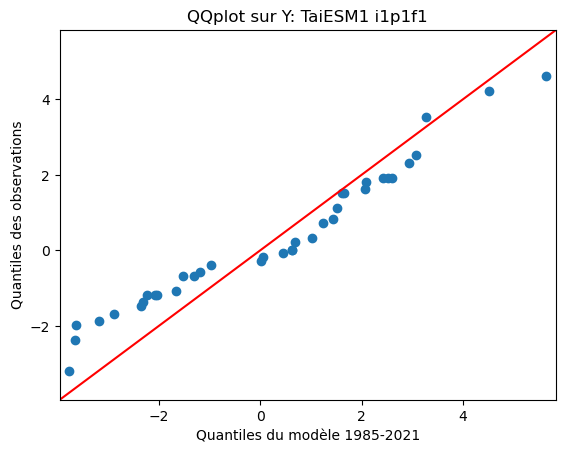

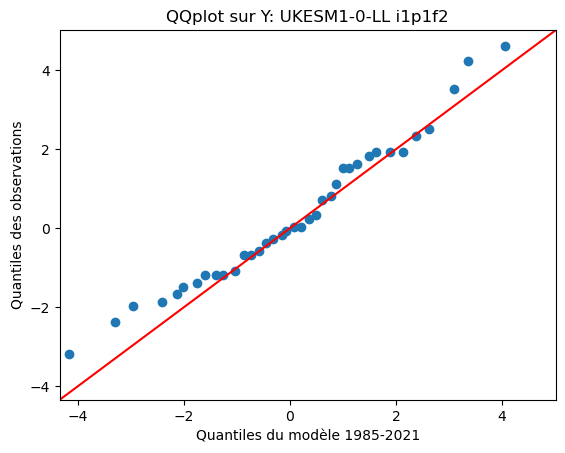

In [9]:
ofile=os.path.join( pathOut , type_data+"_QQplotToObs_X_Modeles.pdf" )

pdf = mpdf.PdfPages( ofile )

time_period_obs=pd.to_datetime(Yo.index.astype(str), yearfirst=True)



for i in range(0,len(lY)):
    m=models[i]
    fig, ax = plt.subplots()
    Y_reduced=lY[i].loc[time_period_obs] #425 point
    pp_x = sm.ProbPlot(Y_reduced.T.to_numpy()[0])
    pp_y = sm.ProbPlot(Yo.T.to_numpy()[0])
    qqplot_2samples(pp_x, pp_y,line="45",xlabel="Quantiles du modèle 1985-2021", ylabel="Quantiles des observations",ax=ax)
    plt.title(" ".join(["QQplot sur Y:"," ".join(m.split("_"))]))
    plt.show()
    
    pdf.savefig(fig)
    plt.close(fig)

pdf.close()